## 데이터로드, 전처리

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#파일로드

file_path = '/content/drive/MyDrive/house_prices.csv'
df = pd.read_csv(file_path, sep=',', index_col=0)

df.head(5)

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
Index,,,,,,,,,,,,,,,,,,,,
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
drop_columns = ['Title', 'Society', 'Dimensions', 'Plot Area', 'Car Parking', 'Ownership', 'Super Area', 'overlooking']
df.drop(columns=drop_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187531 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Description        184508 non-null  object 
 1   Amount(in rupees)  187531 non-null  object 
 2   Price (in rupees)  169866 non-null  float64
 3   location           187531 non-null  object 
 4   Carpet Area        106858 non-null  object 
 5   Status             186916 non-null  object 
 6   Floor              180454 non-null  object 
 7   Transaction        187448 non-null  object 
 8   Furnishing         184634 non-null  object 
 9   facing             117298 non-null  object 
 10  Bathroom           186703 non-null  object 
 11  Balcony            138596 non-null  object 
dtypes: float64(1), object(11)
memory usage: 18.6+ MB


In [ ]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73677 entries, 9 to 187528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        73677 non-null  object 
 1   Amount(in rupees)  73677 non-null  object 
 2   Price (in rupees)  73677 non-null  float64
 3   location           73677 non-null  object 
 4   Carpet Area        73677 non-null  object 
 5   Status             73677 non-null  object 
 6   Floor              73677 non-null  object 
 7   Transaction        73677 non-null  object 
 8   Furnishing         73677 non-null  object 
 9   facing             73677 non-null  object 
 10  Bathroom           73677 non-null  object 
 11  Balcony            73677 non-null  object 
dtypes: float64(1), object(11)
memory usage: 7.3+ MB


In [ ]:
print(df.duplicated(keep=False).sum())
df.drop_duplicates(keep='first', inplace=True)
print(df.duplicated(keep=False).sum())
df.info()

48381
0
<class 'pandas.core.frame.DataFrame'>
Index: 26295 entries, 9 to 187528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        26295 non-null  object 
 1   Amount(in rupees)  26295 non-null  object 
 2   Price (in rupees)  26295 non-null  float64
 3   location           26295 non-null  object 
 4   Carpet Area        26295 non-null  object 
 5   Status             26295 non-null  object 
 6   Floor              26295 non-null  object 
 7   Transaction        26295 non-null  object 
 8   Furnishing         26295 non-null  object 
 9   facing             26295 non-null  object 
 10  Bathroom           26295 non-null  object 
 11  Balcony            26295 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.6+ MB


## 텍스트 전처리

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword_set = set(stopwords.words('english'))

# 1. 가격 추출 후 변환하여 description 내 문자열 치환
def normalize_price_in_text(text):
    text = text.lower().replace(",", "").strip()

    # Crore 변환
    cr_match = re.search(r'(\d+(?:\.\d+)?)\s*cr', text)
    if cr_match:
        val = float(cr_match.group(1)) * 1e7
        return re.sub(r'\d+(?:\.\d+)?\s*cr', f'{int(val)}', text, flags=re.IGNORECASE)

    # Lakh 변환
    lac_match = re.search(r'(\d+(?:\.\d+)?)\s*lac', text)
    if lac_match:
        val = float(lac_match.group(1)) * 1e5
        return re.sub(r'\d+(?:\.\d+)?\s*lac', f'{int(val)}', text, flags=re.IGNORECASE)
    return text

# 2. stopword 제거
def remove_stopwords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stopword_set]
    return ' '.join(filtered_words)

# 3. BHK -> bedroom, hall, kitchen 으로 대체
def expand_bhk(text):
    return re.sub(
        r'(\d+)\s*bhk',
        lambda match: f"{match.group(1)} bedroom 1 hall 1 kitchen",
        text,
        flags=re.IGNORECASE
    )

# 4. Carper Area sqft, sqyrd, sqm 단위 제거
def remove_sqft(text):

    match = re.match(r'(\d+(?:\.\d+)?)\s*(sqft|sqm|sqyrd)', text)
    if not match:
        return None  # 혹은 NaN, 혹은 value

    num, unit = float(match.group(1)), match.group(2)

    if unit == 'sqft':
        return round(num * 0.092903, 2)
    elif unit == 'sqyrd':
        return round(num * 0.836127, 2)
    elif unit == 'sqm':
        return round(num, 2)
    else:
        return None

def clean_text_pipeline(text):
  if not isinstance(text, str):
    return ''
  text = normalize_price_in_text(text)
  text = remove_stopwords(text)
  text = expand_bhk(text)
  return text

df[['Description', 'Amount(in rupees)']] = df[['Description', 'Amount(in rupees)']].applymap(clean_text_pipeline)
df['Carpet Area'] = df['Carpet Area'].apply(remove_sqft)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-7-9499039861e8>:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Description', 'Amount(in rupees)']] = df[['Description', 'Amount(in rupees)']].applymap(clean_text_pipeline)


,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,Bathroom,Balcony
Index,,,,,,,,,,,,
9,one find stunning 3 bedroom 1 hall 1 kitchen f...,16000000,11150.0,thane,83.61,Ready to Move,3 out of 27,Resale,Unfurnished,East,3,1
13,creatively planned constructed 4 bedroom 1 hal...,42500000,17526.0,thane,169.08,Ready to Move,18 out of 27,Resale,Semi-Furnished,East,4,1
15,kasarvadavali thane appealing 2 bedroom 1 hall...,9000000,10000.0,thane,62.71,Ready to Move,10 out of 16,New Property,Unfurnished,North - East,2,1
16,look immaculate 1 bedroom 1 hall 1 kitchen fla...,3700000,5736.0,thane,60.11,Ready to Move,5 out of 7,New Property,Unfurnished,East,1,2
21,gorgeous 2 bedroom 1 hall 1 kitchen flat avail...,16500000,15000.0,thane,61.78,Ready to Move,15 out of 31,Resale,Unfurnished,East,2,2


## 연속형 변수 컬럼 str->float 형변환

In [ ]:
numeric_columns = ['Amount(in rupees)', 'Bathroom', 'Balcony']

for col in numeric_columns:
    print(f"--- {col} ---")
    invalid_values = df[df[col].apply(lambda x: isinstance(x, str) and not x.strip().isdigit())][col].unique()
    print(invalid_values)


def safe_to_float(x):
    if isinstance(x, str):
        x = x.strip()

        if x.isdigit():
            return float(x)

        if x.replace('.','').isdigit():
            return float(x)

        if x.startswith('>'):
            x = x.replace('>', '').strip()
            try:
                return float(x) + 0.1  # '> 10' → 10.1
            except:
                return None

df[numeric_columns] = df[numeric_columns].applymap(safe_to_float)
df.info()

--- Amount(in rupees) ---
[]
--- Bathroom ---
['> 10']
--- Balcony ---
['> 10']
<class 'pandas.core.frame.DataFrame'>
Index: 26295 entries, 9 to 187528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        26295 non-null  object 
 1   Amount(in rupees)  26295 non-null  float64
 2   Price (in rupees)  26295 non-null  float64
 3   location           26295 non-null  object 
 4   Carpet Area        26288 non-null  float64
 5   Status             26295 non-null  object 
 6   Floor              26295 non-null  object 
 7   Transaction        26295 non-null  object 
 8   Furnishing         26295 non-null  object 
 9   facing             26295 non-null  object 
 10  Bathroom           26295 non-null  float64
 11  Balcony            26295 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.6+ MB


<ipython-input-8-850d3e429a52>:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_columns] = df[numeric_columns].applymap(safe_to_float)


### EDA, PreProcessing

### 중복행 확인, 제거

In [ ]:
print(f'Descriptions: {df["Description"].duplicated(keep=False).sum()}')

Descriptions: 135


### 중복된 설명을 가진 데이터 내에 Amount 분포 확인 -> 적정 값으로 대체

In [ ]:
import matplotlib.pyplot as plt

duplicated_descriptions = df[df['Description'].duplicated(keep=False)]

amount_std_by_desc = (
    duplicated_descriptions.groupby('Description')['Amount(in rupees)']
    .std()
    .rename('Amount std')
    .dropna()
)

amount_range_by_desc = (
    duplicated_descriptions.groupby('Description')['Amount(in rupees)']
    .agg(lambda x: x.max() - x.min())
    .rename('Amount Range')
    .dropna()
)

print(f'duplicated_descriptions: {duplicated_descriptions.shape[0]}')

duplicated_descriptions: 135


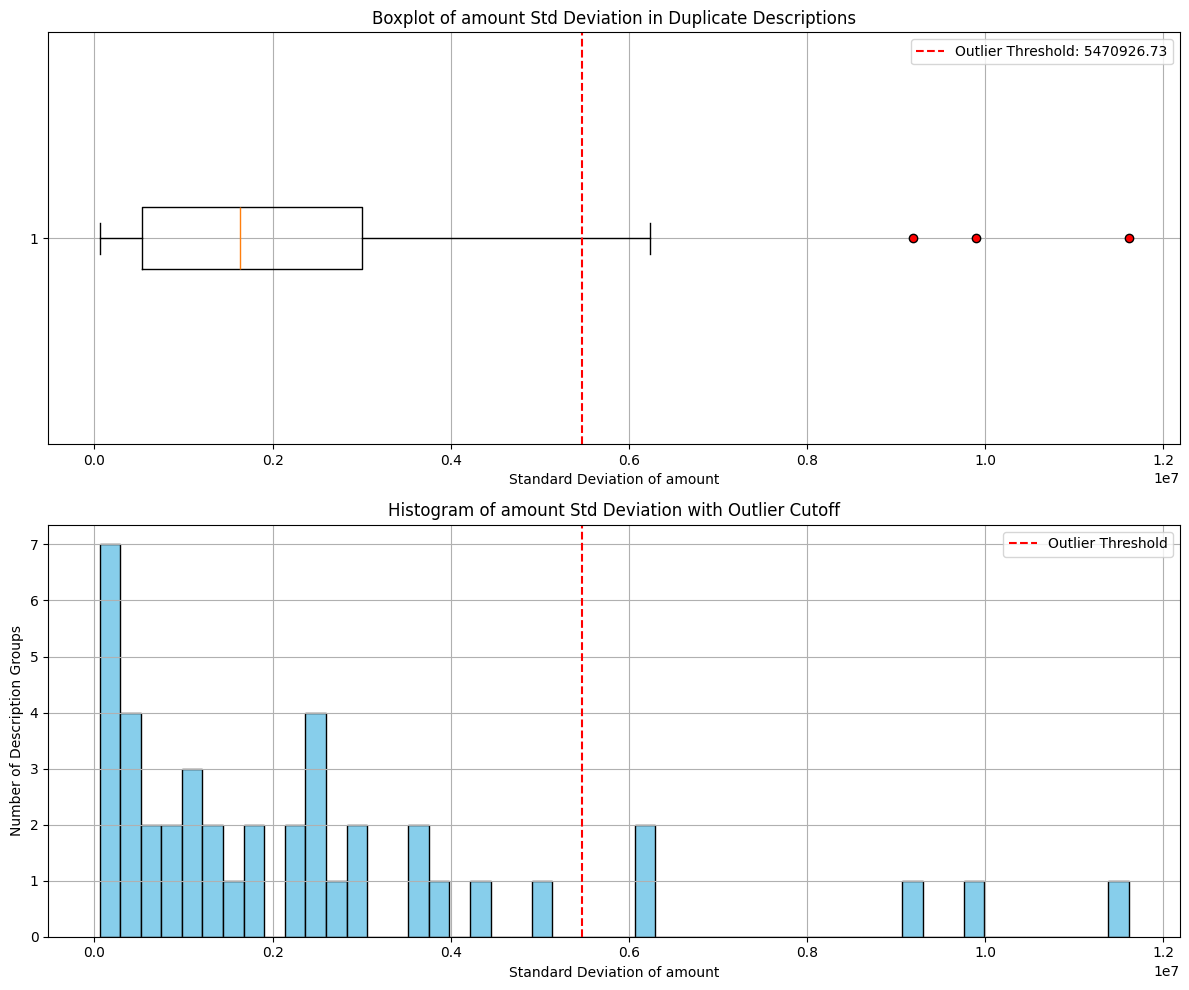

In [ ]:
# 그룹 내의 가격 표준편차, 값 차이가 심하게 큰 값들을 이상치라 보고 제거
# 꼬리가 긴 비정규분포이므로 IQR 사용

Q1 = amount_std_by_desc.quantile(0.25)
Q3 = amount_std_by_desc.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.0 * IQR # 1.5 배에서 1.0 배로 조정

std_outliers = amount_std_by_desc[amount_std_by_desc > outlier_threshold]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axs[0].boxplot(amount_std_by_desc, vert=False, flierprops=dict(markerfacecolor='r', marker='o'))
axs[0].axvline(outlier_threshold, color='red', linestyle='--', label=f'Outlier Threshold: {outlier_threshold:.2f}')
axs[0].set_title("Boxplot of amount Std Deviation in Duplicate Descriptions")
axs[0].set_xlabel("Standard Deviation of amount")
axs[0].legend()
axs[0].grid(True)

axs[1].hist(amount_std_by_desc, bins=50, color='skyblue', edgecolor='black')
axs[1].axvline(outlier_threshold, color='red', linestyle='--', label='Outlier Threshold')
axs[1].set_title("Histogram of amount Std Deviation with Outlier Cutoff")
axs[1].set_xlabel("Standard Deviation of amount")
axs[1].set_ylabel("Number of Description Groups")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

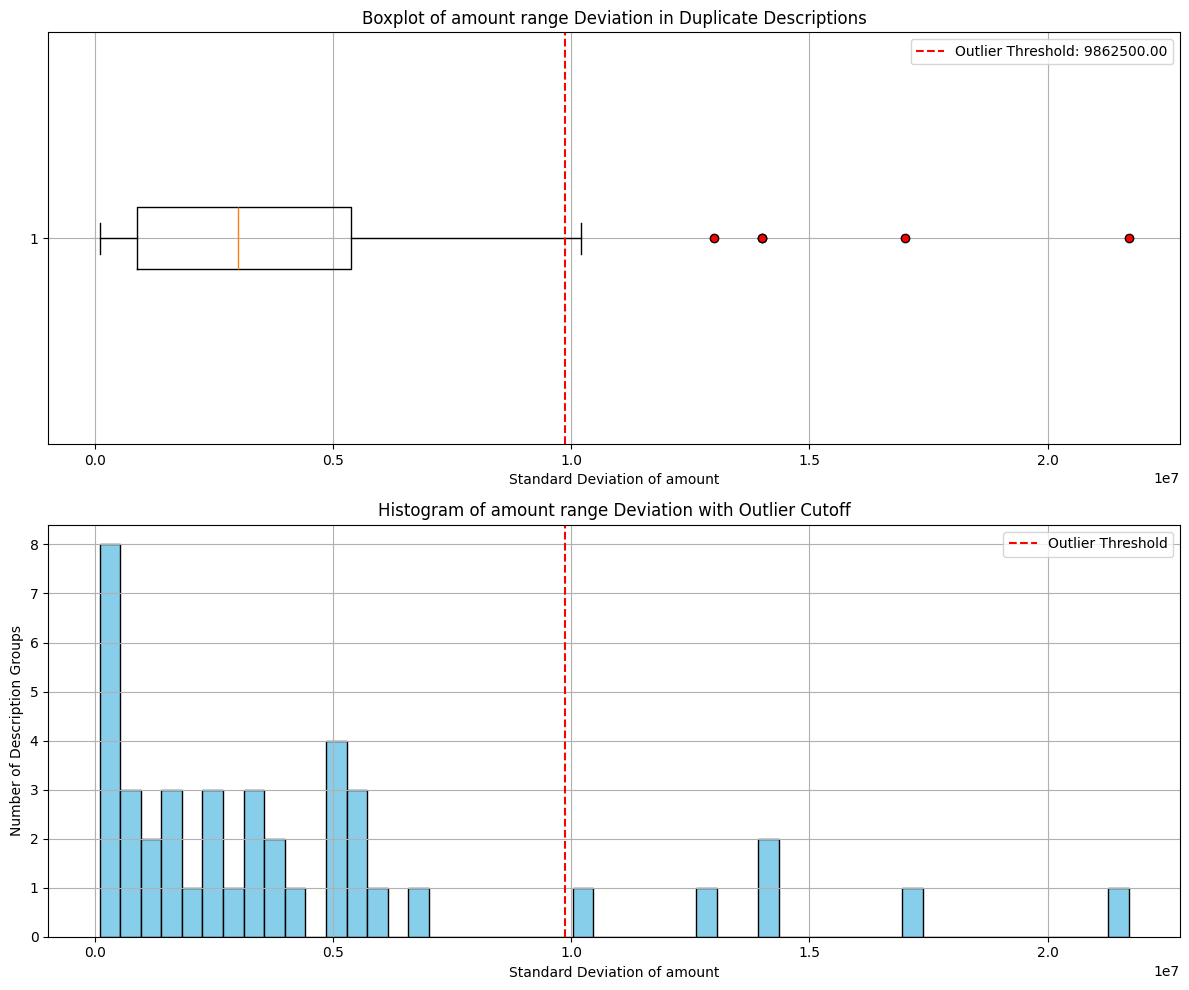

In [ ]:
Q1 = amount_range_by_desc.quantile(0.25)
Q3 = amount_range_by_desc.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.0 * IQR

range_outliers = amount_range_by_desc[amount_range_by_desc > outlier_threshold]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axs[0].boxplot(amount_range_by_desc, vert=False, flierprops=dict(markerfacecolor='r', marker='o'))
axs[0].axvline(outlier_threshold, color='red', linestyle='--', label=f'Outlier Threshold: {outlier_threshold:.2f}')
axs[0].set_title("Boxplot of amount range Deviation in Duplicate Descriptions")
axs[0].set_xlabel("Standard Deviation of amount")
axs[0].legend()
axs[0].grid(True)

axs[1].hist(amount_range_by_desc, bins=50, color='skyblue', edgecolor='black')
axs[1].axvline(outlier_threshold, color='red', linestyle='--', label='Outlier Threshold')
axs[1].set_title("Histogram of amount range Deviation with Outlier Cutoff")
axs[1].set_xlabel("Standard Deviation of amount")
axs[1].set_ylabel("Number of Description Groups")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 이상치 그룹 제거 후 남은 그룹은 그룹내 가격의 평균값으로 대체 후 중복행 삭제

df = df[~df['Description'].isin(std_outliers.index)]
df = df[~df['Description'].isin(range_outliers.index)]

print(df.shape)
df.info()

(26271, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 26271 entries, 9 to 187528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        26271 non-null  object 
 1   Amount(in rupees)  26271 non-null  float64
 2   Price (in rupees)  26271 non-null  float64
 3   location           26271 non-null  object 
 4   Carpet Area        26264 non-null  float64
 5   Status             26271 non-null  object 
 6   Floor              26271 non-null  object 
 7   Transaction        26271 non-null  object 
 8   Furnishing         26271 non-null  object 
 9   facing             26271 non-null  object 
 10  Bathroom           26271 non-null  float64
 11  Balcony            26271 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.6+ MB


## Amount 이상치 제거

count    2.627100e+04
mean     1.239626e+07
std      4.513693e+07
min      1.100000e+05
25%      4.800000e+06
50%      7.500000e+06
75%      1.320000e+07
max      5.100400e+09
Name: Amount(in rupees), dtype: float64


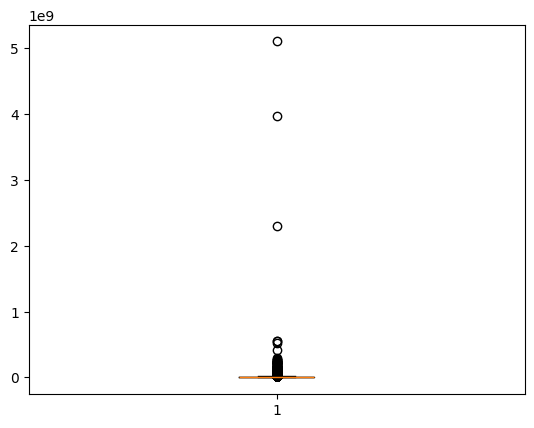

In [ ]:
print(df['Amount(in rupees)'].describe())
plt.boxplot(df['Amount(in rupees)'])
plt.show()

In [ ]:
df = df[df['Amount(in rupees)'] != 0]

In [ ]:
Q1 = df['Amount(in rupees)'].quantile(0.25)
Q3 = df['Amount(in rupees)'].quantile(0.75)
IQR = Q3 - Q1
outter_threshold = Q3 + 1.5 * IQR
inner_threshold = Q1 - 1.5 * IQR

df = df[
    (df['Amount(in rupees)'] <= outter_threshold)
    & (df['Amount(in rupees)'] >= inner_threshold)
]

In [ ]:
df = df[df['Amount(in rupees)'] >= 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23868 entries, 9 to 187528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        23868 non-null  object 
 1   Amount(in rupees)  23868 non-null  float64
 2   Price (in rupees)  23868 non-null  float64
 3   location           23868 non-null  object 
 4   Carpet Area        23865 non-null  float64
 5   Status             23868 non-null  object 
 6   Floor              23868 non-null  object 
 7   Transaction        23868 non-null  object 
 8   Furnishing         23868 non-null  object 
 9   facing             23868 non-null  object 
 10  Bathroom           23868 non-null  float64
 11  Balcony            23868 non-null  float64
dtypes: float64(5), object(7)
memory usage: 2.4+ MB


In [ ]:
df.drop('Status', axis=1, inplace=True)
df.drop(df[df['Transaction'] == 'Other'].index, inplace=True)

In [ ]:
print(df['location'].unique())
print('')
print(df['Transaction'].value_counts())
print('')
print(df['Furnishing'].value_counts())
print('')
print(df['facing'].value_counts())

['thane' 'navi-mumbai' 'nagpur' 'mumbai' 'ahmedabad' 'bangalore' 'chennai'
 'gurgaon' 'hyderabad' 'indore' 'jaipur' 'kolkata' 'lucknow' 'new-delhi'
 'noida' 'pune' 'agra' 'ahmadnagar' 'allahabad' 'aurangabad' 'badlapur'
 'belgaum' 'bhiwadi' 'bhiwandi' 'bhopal' 'bhubaneswar' 'chandigarh'
 'coimbatore' 'dehradun' 'durgapur' 'ernakulam' 'faridabad' 'ghaziabad'
 'goa' 'greater-noida' 'guntur' 'guwahati' 'gwalior' 'haridwar' 'jabalpur'
 'jamshedpur' 'jodhpur' 'kalyan' 'kanpur' 'kochi' 'kozhikode' 'ludhiana'
 'madurai' 'mangalore' 'mohali' 'mysore' 'nashik' 'navsari' 'nellore'
 'palakkad' 'palghar' 'panchkula' 'patna' 'pondicherry' 'raipur'
 'rajahmundry' 'ranchi' 'satara' 'shimla' 'siliguri' 'solapur' 'sonipat'
 'surat' 'thrissur' 'tirupati' 'trichy' 'trivandrum' 'udaipur' 'udupi'
 'vadodara' 'vapi' 'varanasi' 'vijayawada' 'visakhapatnam' 'vrindavan'
 'zirakpur']

Transaction
Resale          15491
New Property     8376
Name: count, dtype: int64

Furnishing
Semi-Furnished    11514
Unfurnishe

## Text, Categorical, Numerical 값으로 나누기


In [ ]:
col_info = {}

col_info['text_cols'] = ['Description', 'location', 'Floor']
col_info['cat_cols'] = ['Transaction', 'Furnishing', 'facing']
col_info['num_cols'] = ['Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony']

## Categorical Value 인코딩

In [ ]:
for col in col_info['cat_cols']:
    df[col] = df[col].astype('category')

df = pd.concat([df,
              pd.get_dummies(
                  df[['facing', 'Furnishing']],
                  prefix=['facing', 'Furnishing'],
                  dtype=float)],
              axis=1)

df = df.drop(['facing', 'Furnishing'], axis=1)
df['Transaction'] = df['Transaction'].cat.codes.astype('float')

df.head()

,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Bathroom,Balcony,facing_East,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished
Index,,,,,,,,,,,,,,,,,,,,
9,one find stunning 3 bedroom 1 hall 1 kitchen f...,16000000.0,11150.0,thane,83.61,3 out of 27,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,kasarvadavali thane appealing 2 bedroom 1 hall...,9000000.0,10000.0,thane,62.71,10 out of 16,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,look immaculate 1 bedroom 1 hall 1 kitchen fla...,3700000.0,5736.0,thane,60.11,5 out of 7,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,gorgeous 2 bedroom 1 hall 1 kitchen flat avail...,16500000.0,15000.0,thane,61.78,15 out of 31,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23,creatively planned constructed 3 bedroom 1 hal...,12800000.0,10940.0,thane,80.83,27 out of 27,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23867 entries, 9 to 187528
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Description                23867 non-null  object 
 1   Amount(in rupees)          23867 non-null  float64
 2   Price (in rupees)          23867 non-null  float64
 3   location                   23867 non-null  object 
 4   Carpet Area                23864 non-null  float64
 5   Floor                      23867 non-null  object 
 6   Transaction                23867 non-null  float64
 7   Bathroom                   23867 non-null  float64
 8   Balcony                    23867 non-null  float64
 9   facing_East                23867 non-null  float64
 10  facing_North               23867 non-null  float64
 11  facing_North - East        23867 non-null  float64
 12  facing_North - West        23867 non-null  float64
 13  facing_South               23867 non-null  float64

## 연속형변수 이상치 제거

In [ ]:
def IQR_outlier_removal(df, col, threshold=1.5):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + threshold * IQR
  lower_bound = Q1 - threshold * IQR

  return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
for col in col_info['num_cols']:
    df = IQR_outlier_removal(df, col, 1.0)

df.shape

(19867, 20)

## 연속형 변수 EDA

In [ ]:
df.describe()

,Amount(in rupees),Price (in rupees),Carpet Area,Transaction,Bathroom,Balcony,facing_East,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished
count,1.986700e+04,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000,19867.000000
mean,6.917449e+06,5014.980822,100.848665,0.645845,2.358937,2.093824,0.469623,0.133387,0.222580,0.028238,0.033724,0.024765,0.014496,0.073187,0.105401,0.473096,0.421503
std,3.680033e+06,1748.171225,32.752036,0.478269,0.647829,0.932298,0.499089,0.340001,0.415989,0.165656,0.180523,0.155411,0.119528,0.260449,0.307077,0.499288,0.493812
min,6.500000e+05,1158.000000,28.240000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000e+06,3728.500000,77.110000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000e+06,4756.000000,97.550000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.520000e+06,6065.500000,122.630000,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.550000e+07,9717.000000,181.000000,1.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


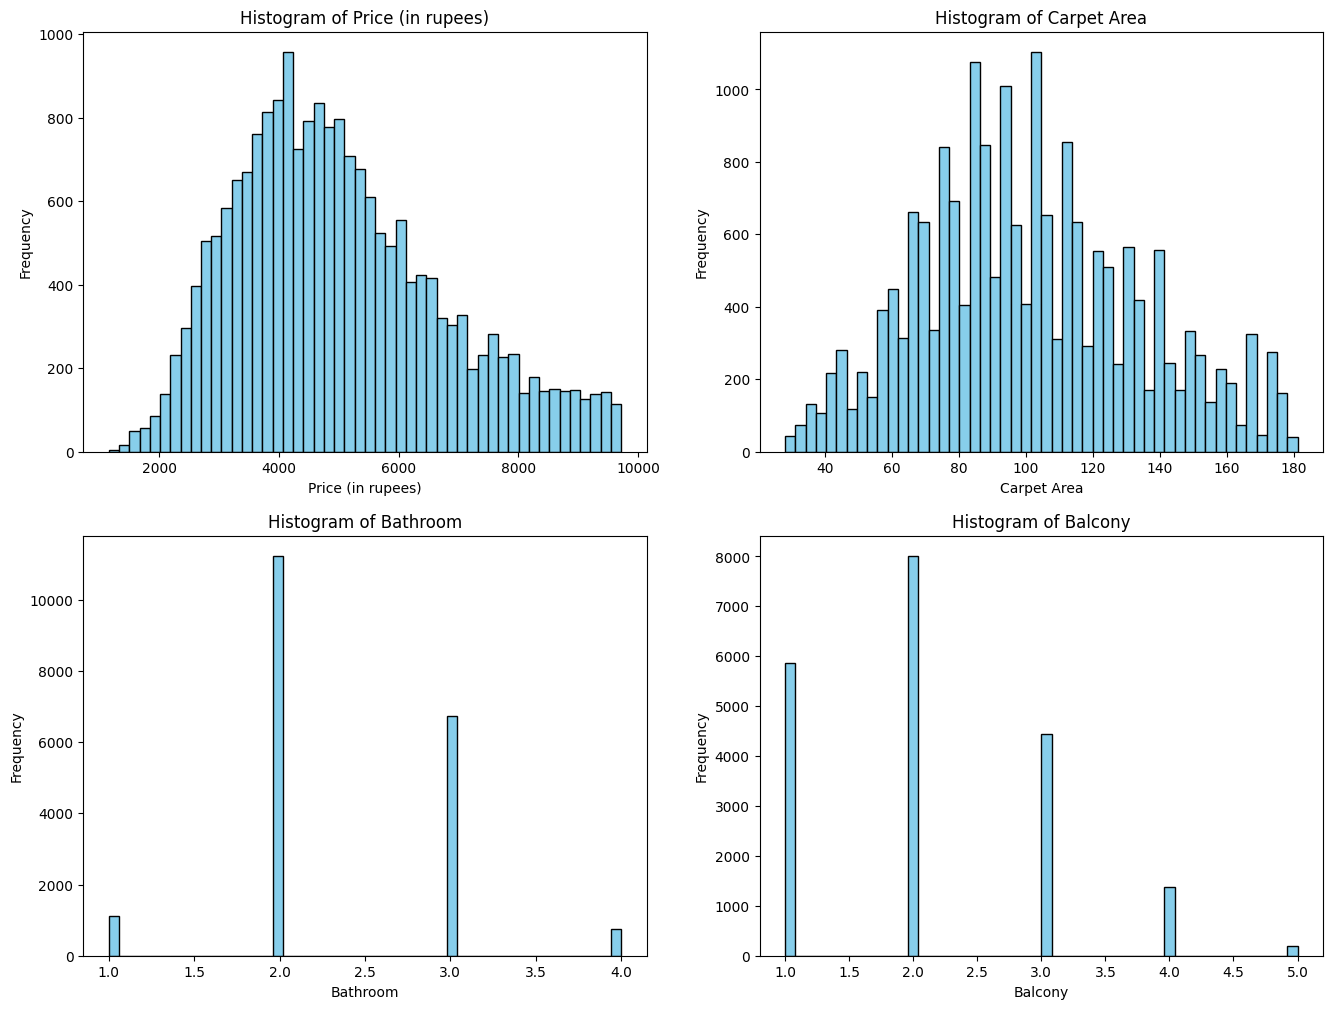

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, col in enumerate(col_info['num_cols']):
    row, col_idx = divmod(i, 2)
    axs[row, col_idx].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axs[row, col_idx].set_title(f"Histogram of {col}")
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel("Frequency")

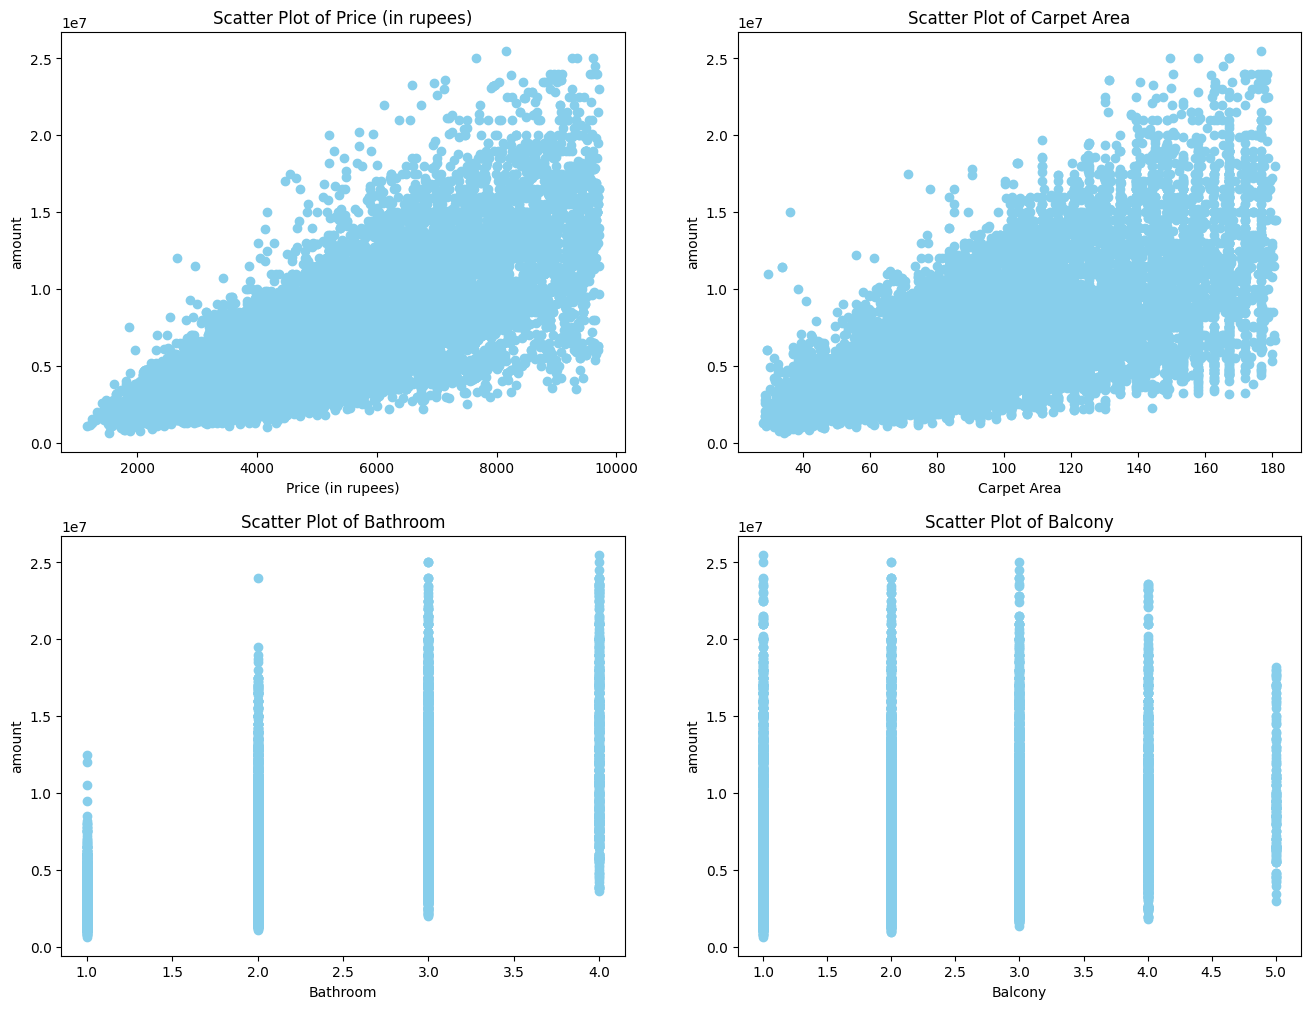

In [ ]:
from tkinter.constants import Y
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, col in enumerate(col_info['num_cols']):
    row, col_idx = divmod(i, 2)
    axs[row, col_idx].scatter(df[col], df['Amount(in rupees)'], color='skyblue')
    axs[row, col_idx].set_title(f"Scatter Plot of {col}")
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel("amount")

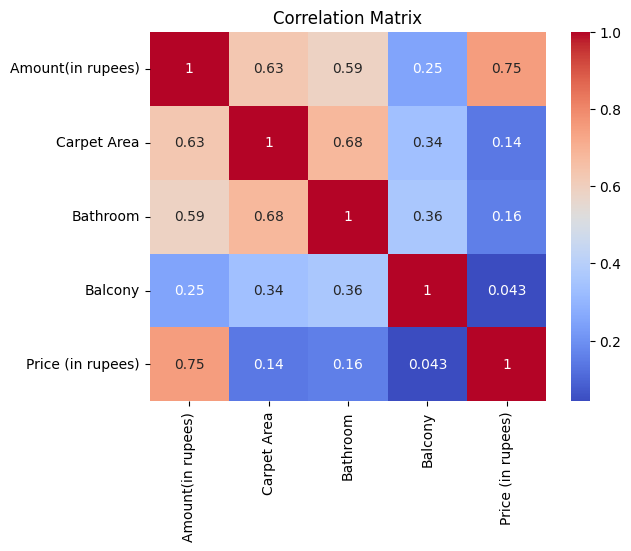

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수 간 상관계수 행렬
corr_matrix = df[['Amount(in rupees)', 'Carpet Area', 'Bathroom', 'Balcony', 'Price (in rupees)']].corr()

# 히트맵으로 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 연속형 변수 전처리

In [ ]:
df[col_info['num_cols']].describe()

,Price (in rupees),Carpet Area,Bathroom,Balcony
count,19867.000000,19867.000000,19867.000000,19867.000000
mean,5014.980822,100.848665,2.358937,2.093824
std,1748.171225,32.752036,0.647829,0.932298
min,1158.000000,28.240000,1.000000,1.000000
25%,3728.500000,77.110000,2.000000,1.000000
50%,4756.000000,97.550000,2.000000,2.000000
75%,6065.500000,122.630000,3.000000,3.000000
max,9717.000000,181.000000,4.000000,5.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# for col in col_info['num_cols']:
    # df[col] = np.log1p(df[col].values)
    # df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

In [ ]:
df[col_info['num_cols']].describe()

,Price (in rupees),Carpet Area,Bathroom,Balcony
count,19867.000000,19867.000000,19867.000000,19867.000000
mean,5014.980822,100.848665,2.358937,2.093824
std,1748.171225,32.752036,0.647829,0.932298
min,1158.000000,28.240000,1.000000,1.000000
25%,3728.500000,77.110000,2.000000,1.000000
50%,4756.000000,97.550000,2.000000,2.000000
75%,6065.500000,122.630000,3.000000,3.000000
max,9717.000000,181.000000,4.000000,5.000000


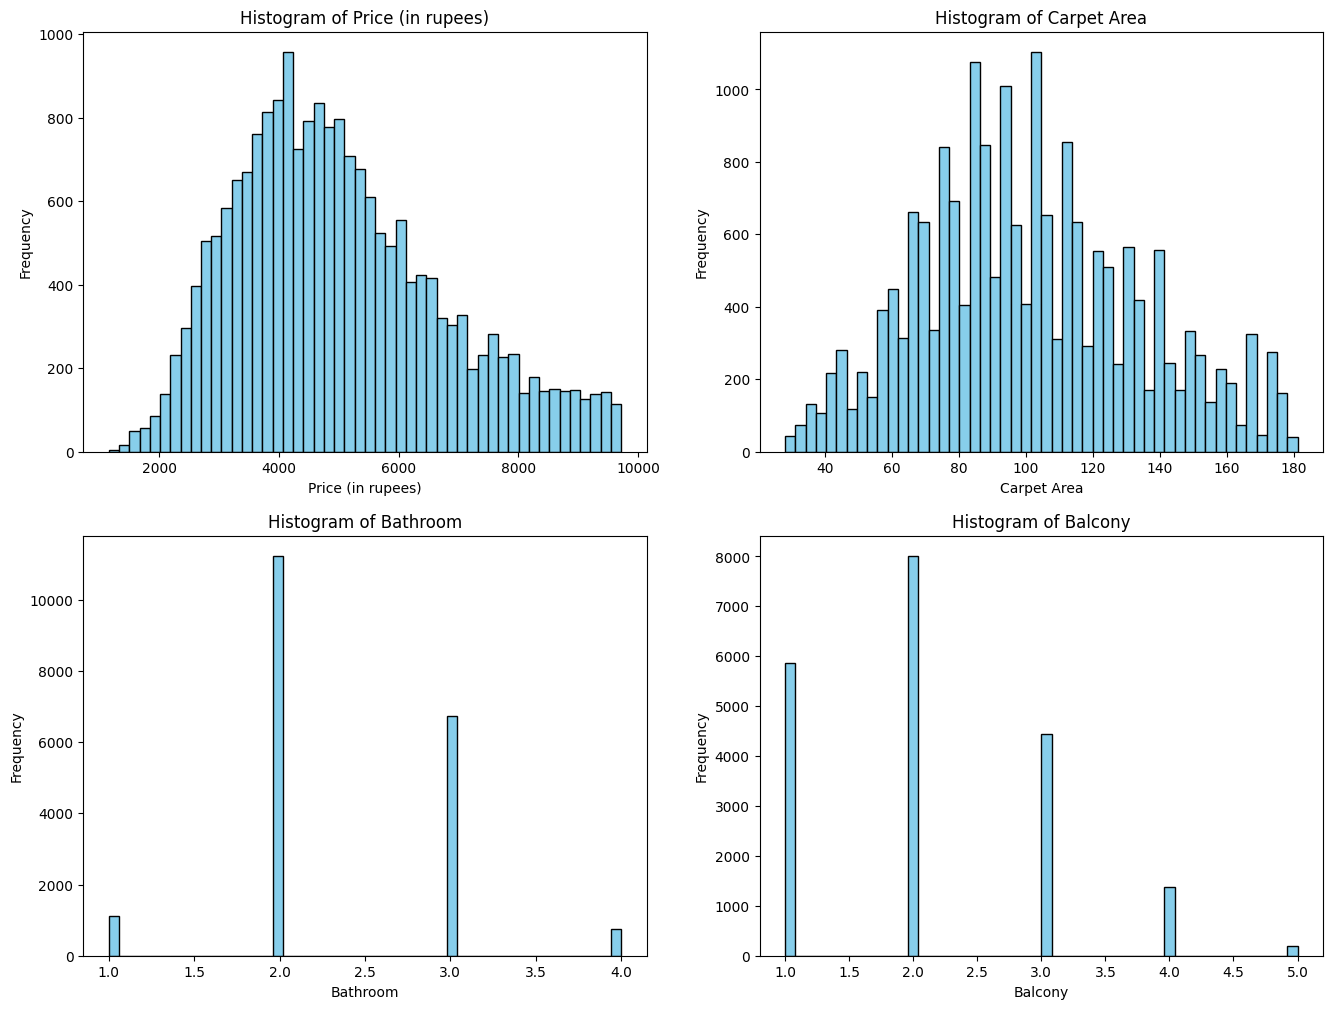

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, col in enumerate(col_info['num_cols']):
    row, col_idx = divmod(i, 2)
    axs[row, col_idx].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axs[row, col_idx].set_title(f"Histogram of {col}")
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel("Frequency")

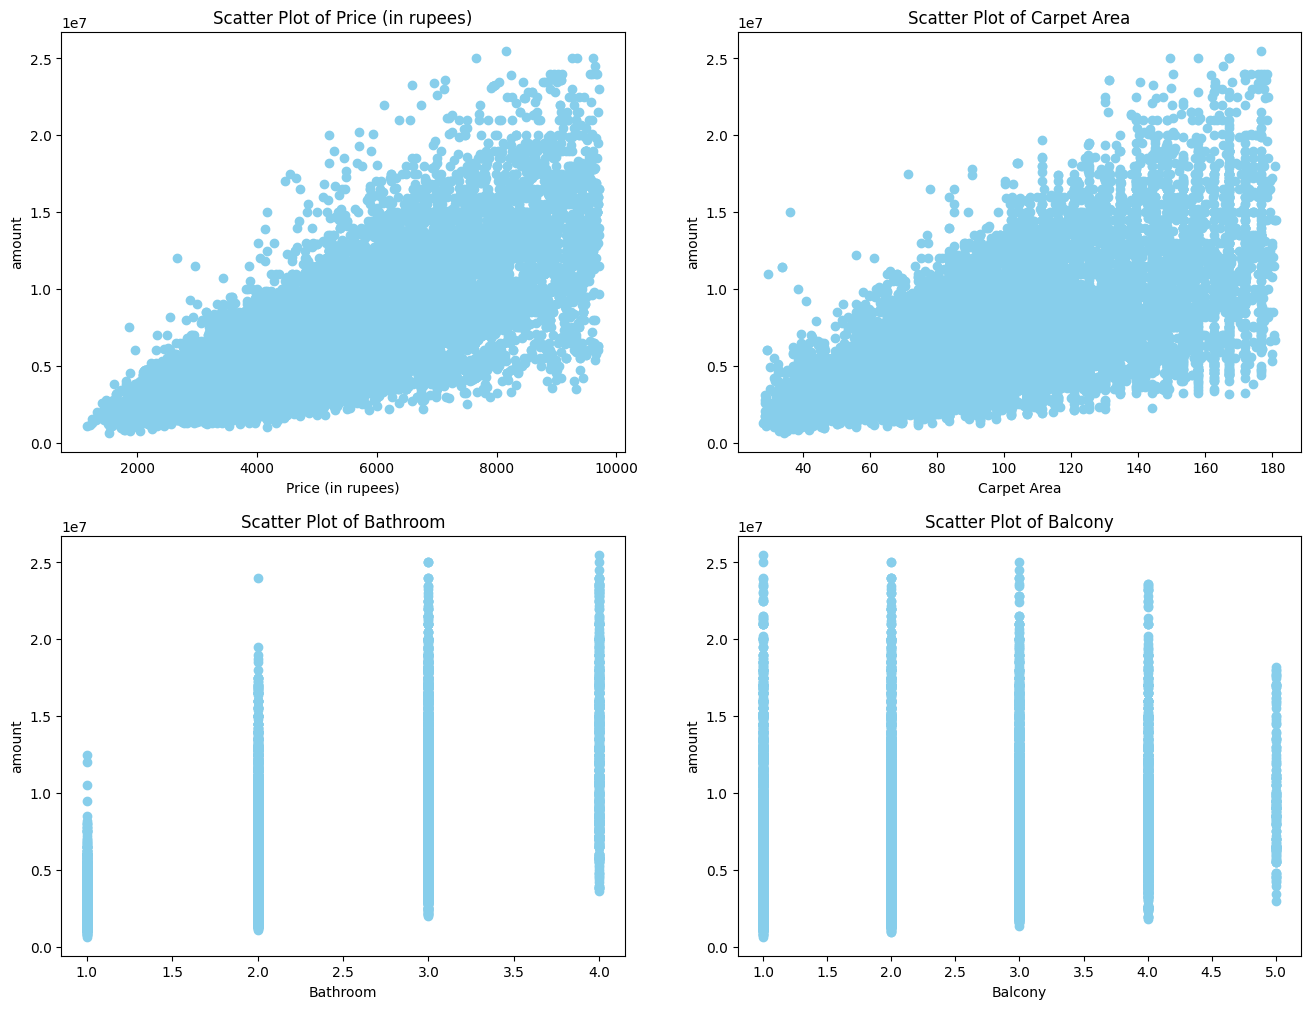

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, col in enumerate(col_info['num_cols']):
    row, col_idx = divmod(i, 2)
    axs[row, col_idx].scatter(df[col], df['Amount(in rupees)'], color='skyblue')
    axs[row, col_idx].set_title(f"Scatter Plot of {col}")
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel("amount")

In [ ]:
X = df.drop(['Amount(in rupees)'], axis=1, inplace=False)
y = df['Amount(in rupees)']

# sample = df.sample(n=500, random_state=42)
# X = sample.drop['Amount(in rupees)']
# y = sample['Amount(in rupees)']

print(X.shape)
print(y.shape)
X.head()

(19867, 19)
(19867,)


,Description,Price (in rupees),location,Carpet Area,Floor,Transaction,Bathroom,Balcony,facing_East,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished
Index,,,,,,,,,,,,,,,,,,,
16,look immaculate 1 bedroom 1 hall 1 kitchen fla...,5736.0,thane,60.11,5 out of 7,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,exquisite 1 bedroom 1 hall 1 kitchen flat offe...,7287.0,thane,40.32,9 out of 24,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,one find stunning 1 bedroom 1 hall 1 kitchen f...,9643.0,thane,40.88,2 out of 7,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50,immediate sale 1 bedroom 1 hall 1 kitchen apar...,8246.0,thane,35.30,2 out of 7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57,discover immaculate 2 bedroom 1 hall 1 kitchen...,8750.0,thane,55.74,14 out of 17,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 임베딩

### Text Feature들 합치기

In [ ]:
text_combined = []

print('Combining all text features...')

for (i, row) in X.iterrows():
  combined = ''
  for text_col in col_info['text_cols']:
    combined += (str(row[text_col]) + ' [unsused1]')
  text_combined.append(combined)

assert(len(text_combined) == len(X))

print('Done')

Combining all text features...
Done


In [ ]:
X = X.drop(columns=col_info['text_cols'], axis=1, inplace=False)
X.insert(0, 'text', text_combined)

with pd.option_context('display.max_colwidth', None):
  display(X.head())

,text,Price (in rupees),Carpet Area,Transaction,Bathroom,Balcony,facing_East,facing_North,facing_North - East,facing_North - West,facing_South,facing_South - East,facing_South -West,facing_West,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished
Index,,,,,,,,,,,,,,,,,
16,look immaculate 1 bedroom 1 hall 1 kitchen flat sale shilphata thane situated green woods township prime location premium flat available sale unbelievable price grab gone ready move flat shilphata taken economical pricing inr 3700000 spacious apartment unfurnished landmarks near apartment include om public school [unsused1]thane [unsused1]5 out of 7 [unsused1],5736.0,60.11,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,exquisite 1 bedroom 1 hall 1 kitchen flat offered sale thakurli thane enjoying prime location property housed balaji annex society premium flat available sale unbelievable price grab gone ready move flat prime area thakurli available reasonable price inr 4700000 flat semi furnished suitable family size nearby landmarks thakurli 90 ft road station 3 min walking distance [unsused1]thane [unsused1]9 out of 24 [unsused1],7287.0,40.32,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,one find stunning 1 bedroom 1 hall 1 kitchen flat sale thane west thane situated jvm shubham township prime location one best properties available resale apartment one significant areas thane west ready move purchased best price inr 5400000 available furnished state flat great buy [unsused1]thane [unsused1]2 out of 7 [unsused1],9643.0,40.88,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50,immediate sale 1 bedroom 1 hall 1 kitchen apartment kasarvadavali thane miss bargain flat sale premium flat available resale unbelievable price grab gone buy ready move flat kasarvadavali reasonable price inr 4700000 unfurnished accommodate needs near new horizon school key nearby landmarks [unsused1]thane [unsused1]2 out of 7 [unsused1],8246.0,35.30,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
57,discover immaculate 2 bedroom 1 hall 1 kitchen flat sale pristine ghodbunder road thane situated vihang hills township prime location apartment property choice resale buy ready move flat ghodbunder road reasonable price inr 7000000 apartment unfurnished near upcoming metro station major landmarks near apartment [unsused1]thane [unsused1]14 out of 17 [unsused1],8750.0,55.74,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
col_info['text_cols'] = ['text']
col_info['num_cols'] = ['Carpet Area', 'Bathroom', 'Balcony']
# col_info['num_cols'] = ['Carpet Area']
col_info['cat_cols'] = ['Transaction', 'facing_East',
       'facing_North', 'facing_North - East', 'facing_North - West',
       'facing_South', 'facing_South - East', 'facing_South -West',
       'facing_West', 'Furnishing_Furnished', 'Furnishing_Semi-Furnished',
       'Furnishing_Unfurnished']

### 임베딩

In [ ]:
from transformers import BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

encoded_corpus = tokenizer(text=X['text'].tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first',
                            max_length=512,
                            return_attention_mask=True)

input_ids = encoded_corpus['input_ids']
attention_mask = encoded_corpus['attention_mask']

## 데이터 분할, 로그, 정규화

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.1
seed = 42

train_inputs, test_inputs, train_masks, test_masks, \
train_cats, test_cats, train_nums, test_nums, \
train_labels, test_labels = train_test_split(input_ids,
                                              attention_mask,
                                              X[col_info['cat_cols']],
                                              X[col_info['num_cols']],
                                              y,
                                              test_size=test_size,
                                              random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

price_scaler = StandardScaler()

train_labels = np.log1p(train_labels)
test_labels = np.log1p(test_labels)

price_scaler.fit(train_labels.values.reshape(-1, 1))
train_labels = price_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = price_scaler.transform(test_labels.values.reshape(-1, 1))

3.60437506339156e-15
1.0


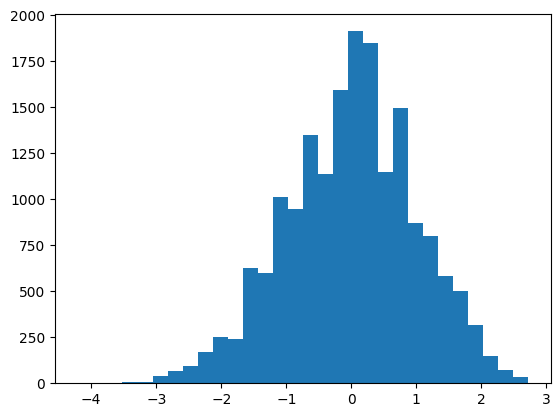

In [ ]:
plt.hist(train_labels,bins=30)
print(train_labels.mean())
print(train_labels.std())

In [ ]:
print(len(train_inputs))
print(len(train_masks))
print(len(train_labels))
print(len(train_cats))
print(len(train_nums))

print(len(test_inputs))
print(len(test_masks))
print(len(test_labels))
print(len(test_cats))
print(len(test_nums))

17880
17880
17880
17880
17880
1987
1987
1987
1987
1987


### DataLoader

## Model, Optimizer, Loss, Scheduler 생성

### Model

In [ ]:
import math
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss, MSELoss


class MLP(nn.Module):

    def __init__(
        self,
        input_dim,
        output_dim,
        num_hidden_lyr=2,
        dropout_prob=0.5,
        return_layer_outs=False,
        hidden_channels=None,
        ln=False,
    ):
        super().__init__()
        self.out_dim = output_dim
        self.dropout = nn.Dropout(dropout_prob)
        self.return_layer_outs = return_layer_outs
        if not hidden_channels:
            hidden_channels = [input_dim for _ in range(num_hidden_lyr)]
        elif len(hidden_channels) != num_hidden_lyr:
            raise ValueError(
                "number of hidden layers should be the same as the lengh of hidden_channels"
            )
        self.layer_channels = [input_dim] + hidden_channels + [output_dim]
        self.act_name = 'relu'
        self.activation = nn.ReLU()
        self.layers = nn.ModuleList(
            list(
                map(
                    self.weight_init,
                    [
                        nn.Linear(self.layer_channels[i], self.layer_channels[i + 1])
                        for i in range(len(self.layer_channels) - 2)
                    ],
                )
            )
        )
        final_layer = nn.Linear(self.layer_channels[-2], self.layer_channels[-1])
        self.weight_init(final_layer, activation="linear")
        self.layers.append(final_layer)

        self.ln = ln
        if self.ln:
            self.ln = nn.ModuleList(
                [torch.nn.LayerNorm(dim) for dim in self.layer_channels[1:-1]]
            )

    def weight_init(self, m, activation=None):
        if activation is None:
            activation = self.act_name
        torch.nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain(activation))
        return m

    def forward(self, x):

        x = x.float()
        layer_inputs = [x]
        for i, layer in enumerate(self.layers):
            input = layer_inputs[-1]
            if layer == self.layers[-1]:
                layer_inputs.append(layer(input))
            else:
                if self.ln:
                    output = self.activation(self.ln[i](layer(input)))
                else:
                    output = self.activation(layer(input))
                layer_inputs.append(self.dropout(output))

        # model.store_layer_output(self, layer_inputs[-1])
        if self.return_layer_outs:
            return layer_inputs[-1], layer_inputs
        else:
            return layer_inputs[-1]

In [ ]:
from torch import nn
from transformers import BertForSequenceClassification

class BertWithTabular(BertForSequenceClassification):

    def __init__(self, config):
        super().__init__(config)

        self.num_labels = config.num_labels
        combined_feat_dim = config.text_feat_dim + config.cat_feat_dim + config.numerical_feat_dim
        self.num_ln = nn.LayerNorm(config.numerical_feat_dim)
        # self.num_bn = nn.Identity()

######################################################
        self.pooled_transform = nn.Sequential(
            nn.LayerNorm(768),
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 768)
        )
######################################################
        dims = []
        dim = combined_feat_dim

        while True:
            dim = dim // 4

            if dim <= self.num_labels:
                break

            dims.append(int(dim))

        print('MLP layer sizes:')
        print(' Input:', combined_feat_dim)
        print(' Hidden:', dims)
        print(' Output:', self.num_labels)
        print('')

        self.mlp = MLP(combined_feat_dim,
                       self.num_labels,
                       num_hidden_lyr=len(dims),
                       dropout_prob=0.1,
                       hidden_channels=dims,
                       ln=True
                      #  bn=False
                       )

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        class_weights=None,
        output_attentions=None,
        output_hidden_states=None,
        cat_feats=None,
        numerical_feats=None,
    ):

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
        )
        # Bert Pooler CLS
        # pooled_output = outputs[1]

############################################################################################################
        # mean pool
        last_hidden = outputs.last_hidden_state  # (batch_size, seq_len, hidden_size)
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden.size()).float()
        sum_embeddings = torch.sum(last_hidden * input_mask_expanded, dim=1)
        sum_mask = torch.clamp(input_mask_expanded.sum(dim=1), min=1e-9)
        pooled_output = sum_embeddings / sum_mask
        pooled_output = self.dropout(pooled_output)

        pooled_output = self.pooled_transform(pooled_output)
        pooled_output = pooled_output / (pooled_output.norm(dim=1, keepdim=True) + 1e-6)

        # # log
        # print("pooled_output NaN:", torch.isnan(pooled_output).any().item())
        # print("cat_feats NaN:", torch.isnan(cat_feats).any().item())
        # print("numerical_feats NaN:", torch.isnan(numerical_feats).any().item())
        # print("pooled_output max/min:", pooled_output.max().item(), pooled_output.min().item())
        # print("numerical_feats std:", numerical_feats.std(dim=0))  # 거의 0이면 문제
        # print("Batch numerical_feats sample:\n", numerical_feats[:5])


############################################################################################################

        numerical_feats = self.num_ln(numerical_feats)

        combined_feats = torch.cat((pooled_output, cat_feats, numerical_feats),
                                   dim=1)

        logits = self.mlp(combined_feats)

############################################################################################################
        # print("logits NaN:", torch.isnan(logits).any()) #log
        # print("labels NaN:", torch.isnan(labels).any()) #log
############################################################################################################


        if type(logits) is tuple:
            logits, classifier_layer_outputs = logits
        else:
            classifier_layer_outputs = [combined_feats, logits]

        if labels is not None:
            if self.num_labels == 1:
                loss_fct = MSELoss()
                labels = labels.float()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = CrossEntropyLoss(weight=class_weights)
                labels = labels.long()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        else:
            loss = None

        return loss, logits, classifier_layer_outputs

### GPU

In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU.")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")

Using GPU.


In [ ]:
from transformers import BertConfig

config = BertConfig.from_pretrained('bert-base-uncased',
                                    num_labels=1,)

config.numerical_feat_dim = len(col_info['num_cols'])
config.cat_feat_dim = len(col_info['cat_cols'])
config.text_feat_dim = config.hidden_size

model = BertWithTabular.from_pretrained(
    'bert-base-uncased',
    config=config
)

model.to(device)

Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'mlp.layers.0.bias', 'mlp.layers.0.weight', 'mlp.layers.1.bias', 'mlp.layers.1.weight', 'mlp.layers.2.bias', 'mlp.layers.2.weight', 'mlp.layers.3.bias', 'mlp.layers.3.weight', 'mlp.layers.4.bias', 'mlp.layers.4.weight', 'mlp.ln.0.bias', 'mlp.ln.0.weight', 'mlp.ln.1.bias', 'mlp.ln.1.weight', 'mlp.ln.2.bias', 'mlp.ln.2.weight', 'mlp.ln.3.bias', 'mlp.ln.3.weight', 'num_ln.bias', 'num_ln.weight', 'pooled_transform.0.bias', 'pooled_transform.0.weight', 'pooled_transform.1.bias', 'pooled_transform.1.weight', 'pooled_transform.4.bias', 'pooled_transform.4.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


MLP layer sizes:
 Input: 783
 Hidden: [195, 48, 12, 3]
 Output: 1



BertWithTabular(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

## DataLoader

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

def create_dataloaders(inputs, masks, cats, nums, labels, batch_size, train=True):
    input_tensor = torch.tensor(inputs)
    mask_tensor = torch.tensor(masks)
    cat_tensor = torch.tensor(cats.values, dtype=torch.float32)
    num_tensor = torch.tensor(nums.values, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.float32)
    dataset = TensorDataset(input_tensor, mask_tensor,
                            cat_tensor, num_tensor,
                            labels_tensor)
    if train:
        sampler = RandomSampler(dataset)
    else:
        sampler = SequentialSampler(dataset)

    dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)
    return dataloader

train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

train_dataloader = create_dataloaders(train_inputs, train_masks,
                                      train_cats, train_nums,
                                      train_labels, batch_size, train=True)
test_dataloader = create_dataloaders(test_inputs, test_masks,
                                     test_cats, test_nums,
                                     test_labels, batch_size, train=False)

### Optimizer, Scheduler, Loss

In [ ]:
from transformers import get_linear_schedule_with_warmup

batch_size = 16
learning_rate = 3e-3
epochs = 4
total_steps = len(train_dataloader) * epochs

# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, eps=1e-8)

optimizer = torch.optim.AdamW([
    {"params": model.bert.parameters(), "lr": 2e-5, "eps": 1e-8},
    {"params": model.mlp.parameters(), "lr": 1e-3, "eps": 1e-8},
    {"params": model.pooled_transform.parameters(), "lr": 1e-2, "eps": 1e-8}
])

scheduler = get_linear_schedule_with_warmup(optimizer,
                 num_warmup_steps=0, num_training_steps=total_steps)

## 학습, 검증

In [ ]:
def r2_score(outputs, labels):
    labels_mean = torch.mean(labels)
    ss_tot = torch.sum((labels - labels_mean) ** 2)
    ss_res = torch.sum((labels - outputs) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

def evaluate(model, test_dataloader, loss_fn, device):

    model.eval()

    test_loss, test_r2 = [], []

    for batch in test_dataloader:
        batch_inputs, batch_masks, batch_cats, batch_nums, batch_labels = \
                               tuple(b.to(device) for b in batch)
        with torch.no_grad():
            outputs = model(batch_inputs,
                            token_type_ids=None,
                            attention_mask=batch_masks,
                            cat_feats=batch_cats,
                            numerical_feats=batch_nums
                            )

        logits = outputs[1]
        loss = loss_fn(logits, batch_labels)
        test_loss.append(loss.item())

        r2 = r2_score(logits, batch_labels)
        test_r2.append(r2.item())

    return test_loss, test_r2

In [ ]:
from torch.nn.utils.clip_grad import clip_grad_norm_
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# def forward(
#     self,
#     input_ids=None,
#     attention_mask=None,
#     token_type_ids=None,
#     position_ids=None,
#     head_mask=None,
#     inputs_embeds=None,
#     labels=None,
#     class_weights=None,
#     output_attentions=None,
#     output_hidden_states=None,
#     cat_feats=None,
#     numerical_feats=None,
# )

# return loss, logits, classifier_layer_outputs

def train(model, optimizer, scheduler, epochs,
          train_dataloader, device, test_dataloader, loss_fn, clip_value=2):

    train_losses = []
    validation_losses = []
    r2_scores = []

    for epoch in range(epochs):
        print('Epoch: ',epoch+1)
        print("-----")
        print('Training...')
        best_loss = 1e10
        model.train()
        total_loss = 0
        for step, batch in enumerate(train_dataloader):

            batch_inputs, batch_masks, batch_cats, batch_nums, batch_labels = \
                               tuple(b.to(device) for b in batch)

            model.zero_grad()

            outputs = model(batch_inputs,
                            token_type_ids=None,
                            attention_mask=batch_masks,
                            labels=batch_labels,
                            cat_feats=batch_cats,
                            numerical_feats=batch_nums
                            )

            loss = outputs[0]
            logits = outputs[1]
            classifier_layer_outputs = outputs[2]
            total_loss += loss.item()

            # print(f"{loss.item()=}") ## log
            # before = model.bert.encoder.layer[0].output.dense.weight.clone().detach().cpu() ## log
            loss.backward()
            # print(model.bert.encoder.layer[0].output.dense.weight.grad.abs().mean()) ## log
            clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()
            # after = model.bert.encoder.layer[0].output.dense.weight.clone().detach().cpu() ## log
            # print(torch.allclose(before, after, atol=1e-7)) ## log
            scheduler.step()

            if step % 100 == 0 and not step == 0:
              print(f'Batch: {step}/{len(train_dataloader)}')


        avg_train_loss = total_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)

        print(f'Epoch{epoch+1} Average Training Loss: {avg_train_loss:>5f}')

        print('\nValidaion...')

        test_loss, test_r2 = evaluate(model, test_dataloader, loss_fn, device)

        avg_test_loss = sum(test_loss) / len(test_loss)
        avg_test_r2 = sum(test_r2) / len(test_r2)

        validation_losses.append(avg_test_loss)
        r2_scores.append(avg_test_r2)

        print(f'Epoch {epoch+1} Average Test Loss: {avg_test_loss:>5f}')
        print(f'Epoch {epoch+1} Average Test R2: {avg_test_r2:>5f}\n')

    return model, train_losses, validation_losses, r2_scores

In [ ]:
def free_gpu_cache():
    import gc
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

free_gpu_cache()

In [ ]:
def force_reset_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight, gain=1.0)
        if m.bias is not None:
            m.bias.data.fill_(0.01)

model.mlp.apply(force_reset_weights)
model.pooled_transform.apply(force_reset_weights)


Sequential(
  (0): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (1): Linear(in_features=768, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=512, out_features=768, bias=True)
)

## 학습수행

In [ ]:
model, train_losses, validation_losses, r2_scores \
= train(model,
        optimizer,
        scheduler,
        epochs,
        train_dataloader,
        device,
        test_dataloader,
        nn.MSELoss(),
        clip_value=2.0)

Epoch:  1
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch1 Average Training Loss: 0.707057

Validaion...
Epoch 1 Average Test Loss: 0.239131
Epoch 1 Average Test R2: 0.759784

Epoch:  2
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch2 Average Training Loss: 0.301182

Validaion...
Epoch 2 Average Test Loss: 0.162089
Epoch 2 Average Test R2: 0.838283

Epoch:  3
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch3 Average Training Loss: 0.258398

Validaion...
Epoch 3 Average Test Loss: 0.127329
Epoch 3 Average Test R2: 0.874982

Epoch:  4
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch4 Average Training Loss: 0.229643

Validaion...
Epoch 4 Average Test Loss: 0.116453
Epoch 4 Average Test R2: 0.885658



## 학습 경과 시각화

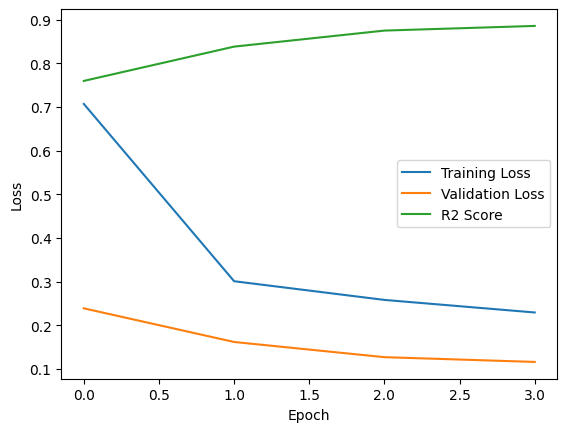

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.plot(r2_scores, label='R2 Score')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
torch.save({
    'epoch': 4,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
}, 'checkpoint.pth')

In [ ]:
# 로드
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
start_epoch = checkpoint['epoch'] + 1

In [ ]:
model, train_losses_2, validation_losses_2, r2_scores_2 \
= train(model,
        optimizer,
        scheduler,
        6,
        train_dataloader,
        device,
        test_dataloader,
        nn.MSELoss(),
        clip_value=2.0)

Epoch:  1
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch1 Average Training Loss: 0.222527

Validaion...
Epoch 1 Average Test Loss: 0.116453
Epoch 1 Average Test R2: 0.885658

Epoch:  2
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch2 Average Training Loss: 0.221074

Validaion...
Epoch 2 Average Test Loss: 0.116453
Epoch 2 Average Test R2: 0.885658

Epoch:  3
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch3 Average Training Loss: 0.225609

Validaion...
Epoch 3 Average Test Loss: 0.116453
Epoch 3 Average Test R2: 0.885658

Epoch:  4
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batch: 500/559
Epoch4 Average Training Loss: 0.221883

Validaion...
Epoch 4 Average Test Loss: 0.116453
Epoch 4 Average Test R2: 0.885658

Epoch:  5
-----
Training...
Batch: 100/559
Batch: 200/559
Batch: 300/559
Batch: 400/559
Batc

In [ ]:
train_losses.extend(train_losses_2)
validation_losses.extend(validation_losses_2)
r2_scores.extend(r2_scores_2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

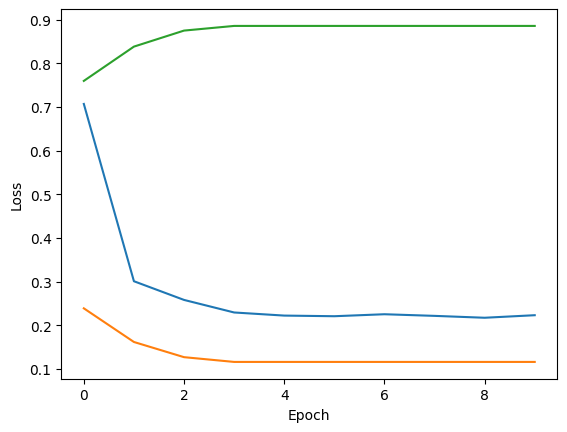

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.plot(r2_scores, label='R2 Score')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt